### Import Library, Baca dan Load Data
Mengimpor semua library yang diperlukan untuk analisis data, pemodelan, dan visualisasi. Library yang digunakan termasuk 'pandas' untuk manipulasi data, 'numpy' untuk operasi numerik, 'matplotlib' dan 'seaborn' untuk visualisasi, 'scikit-learn' untuk pemodelan, dan 'category_encoders' untuk encoding fitur kategorikal.
Membaca data dari file CSV yang bernama 'data_fix.csv'.
Menampilkan beberapa baris pertama dari data yang dibaca untuk memastikan bahwa data dimuat dengan benar.

In [1]:
# Langkah 1: Import Library, Membaca Dataset dan Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import category_encoders as ce

# Membaca file CSV
df = pd.read_csv('data_fix.csv')
df.head()
# Menampilkan DataFrame baru
print("DataFrame baru:")
print(df.head())

DataFrame baru:
          USER_ID  PRODUCT_ID  RATING  TIME_STAMP
0   AKM1MP6P0OYPR  0132793040       5  1365811200
1  A2CX7LUOHB2NDG  0321732944       5  1341100800
2  A2NWSAGRHCP8N5  0439886341       1  1367193600
3  A2WNBOD3WNDNKT  0439886341       3  1374451200
4  A1GI0U4ZRJA8WN  0439886341       1  1334707200


### Konversi Kolom TIME_STAMP ke Tipe Datetime
Konversi kolom TIME_STAMP ke tipe datetime memungkinkan manipulasi data waktu secara lebih efektif. df.info() digunakan untuk memverifikasi tipe data kolom.

In [2]:
# Langkah 2: Konversi Kolom TIME_STAMP ke Tipe Datetime
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

# Menampilkan tipe data untuk memverifikasi konversi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   USER_ID     object        
 1   PRODUCT_ID  object        
 2   RATING      int64         
 3   TIME_STAMP  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 238.8+ MB


### Pemeriksaan Data yang Null
Pemeriksaan untuk nilai null dilakukan menggunakan df.isnull().sum(). Mengetahui apakah ada nilai null dalam dataset penting untuk memastikan data siap untuk analisis lebih lanjut.

In [3]:
# Langkah 3: Memeriksa Data yang Null
null_check = df.isnull().sum()
any_null = df.isnull().any().any()

print("Pemeriksaan nilai null di setiap kolom:")
print(null_check)

if any_null:
    print("\nAda nilai null di DataFrame.")
else:
    print("\nTidak ada nilai null di DataFrame.")


Pemeriksaan nilai null di setiap kolom:
USER_ID       0
PRODUCT_ID    0
RATING        0
TIME_STAMP    0
dtype: int64

Tidak ada nilai null di DataFrame.


### Normalisasi Data
Normalisasi dilakukan untuk skala nilai rating antara 0 dan 1. Ini membantu dalam standar untuk algoritma pembelajaran mesin. Normalisasi menggunakan Min-Max Scaling.

In [5]:
# Langkah 4: Normalisasi Data
df['RATING_NORMALIZED'] = (df['RATING'] - df['RATING'].min()) / (df['RATING'].max() - df['RATING'].min())

# Menampilkan beberapa baris pertama dari DataFrame untuk memverifikasi normalisasi
df.head()


,USER_ID,PRODUCT_ID,RATING,TIME_STAMP,RATING_NORMALIZED
0,AKM1MP6P0OYPR,0132793040,5,1970-01-01 00:00:01.365811200,1.0
1,A2CX7LUOHB2NDG,0321732944,5,1970-01-01 00:00:01.341100800,1.0
2,A2NWSAGRHCP8N5,0439886341,1,1970-01-01 00:00:01.367193600,0.0
3,A2WNBOD3WNDNKT,0439886341,3,1970-01-01 00:00:01.374451200,0.5
4,A1GI0U4ZRJA8WN,0439886341,1,1970-01-01 00:00:01.334707200,0.0


### Membuat Target Diskret dari Rating
Membuat target diskret dari RATING_NORMALIZED dengan membaginya menjadi 3 kategori (0, 1, 2). Dengan 2 rating tinggi, 1 rating tengah", 0 rating buruk.

In [6]:
# Langkah 5: Membuat target diskret dari rating
df['RATING_DISCRETE'] = pd.cut(df['RATING_NORMALIZED'], bins=3, labels=[0, 1, 2]).astype(int)

# Tampilkan beberapa baris pertama untuk memastikan perubahan
df[['RATING_NORMALIZED', 'RATING_DISCRETE']].head()



,RATING_NORMALIZED,RATING_DISCRETE
0,1.0,2
1,1.0,2
2,0.0,0
3,0.5,1
4,0.0,0


### Menampilkan Distribusi Data dan Visualisasi Data
Distribusi data dinormalisasi ditampilkan menggunakan histogram dan distribusi normal overlay. Ini membantu memahami sebaran data setelah normalisasi.

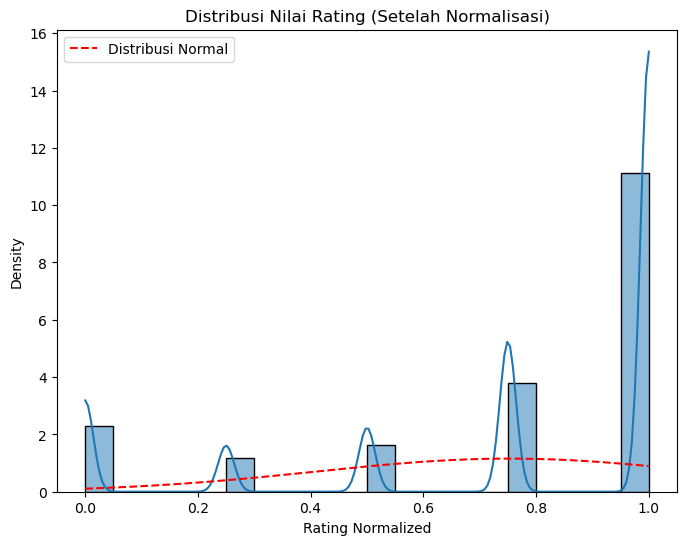

In [8]:
# Langkah 6: Menampilkan Distribusi Data
plt.figure(figsize=(8, 6))
sns.histplot(df['RATING_NORMALIZED'], bins=20, kde=True, stat='density')
x = np.linspace(df['RATING_NORMALIZED'].min(), df['RATING_NORMALIZED'].max(), 1000)
mu = df['RATING_NORMALIZED'].mean()
sigma = df['RATING_NORMALIZED'].std()
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, y, color='red', linestyle='--', label='Distribusi Normal')
plt.title('Distribusi Nilai Rating (Setelah Normalisasi)')
plt.xlabel('Rating Normalized')
plt.ylabel('Density')
plt.legend()
plt.show()


Keterangan dari Output Grafik :
Grafik tersebut menunjukkan distribusi nilai rating yang dinormalisasi yang diberikan oleh pengguna kepada produk. Sumbu x mewakili nilai rating yang dinormalisasi, yang berkisar dari 0 hingga 1, dan sumbu y mewakili kepadatan atau frekuensi setiap nilai rating. Grafik memiliki lima puncak yang jelas, menunjukkan bahwa terdapat lima kelompok rating yang menonjol:
    1. Puncak di sekitar 0, menunjukkan banyaknya rating yang rendah (kemungkinan 1 atau 2 bintang).
    2. Puncak di sekitar 0,3, menunjukkan jumlah rating yang moderat (kemungkinan 3 bintang).
    3. Puncak di sekitar 0,5, menunjukkan jumlah rating yang moderat lainnya (kemungkinan 3 atau 4 bintang).
    4. Puncak di sekitar 0,8, menunjukkan jumlah rating yang tinggi (kemungkinan 4 atau 5 bintang).
    5. Puncak di sekitar 1,0, menunjukkan banyaknya rating yang sangat tinggi (kemungkinan 5 bintang).
Garis putus-putus merah mewakili distribusi normal, yang tidak diikuti oleh data rating. Ini menunjukkan bahwa rating tidak tersebar merata dan lebih banyak terkonsentrasi di beberapa titik tertentu. Hal ini mengimplikasikan bahwa : 
    A.Banyak pengguna cenderung memberikan rating yang rendah (sekitar 1 atau 2 bintang) kepada produk.
    B.Terdapat dua kelompok pengguna yang memberikan rating yang moderat (sekitar 3 bintang).
    C.Jumlah pengguna yang memberikan rating yang tinggi (sekitar 4 atau 5 bintang) kepada produk cukup signifikan.
    D. Rating tidak tersebar merata, dan terdapat pola atau bias yang jelas dalam cara pengguna menilai produk.
Grafik ini dapat berguna untuk memahami perilaku pengguna, mengidentifikasi pola dalam rating produk, dan potensi menginformasikan pengembangan produk atau sistem rekomendasi.

### Menentukan Fitur dan Target
Fitur digunakan untuk melatih model, sedangkan target adalah nilai yang ingin diprediksi. Menentukan fitur dengan membuang kolom yang tidak diperlukan dan menyimpan target diskret sebagai y.

In [7]:
# Langkah 7: Menentukan fitur dan target
X = df.drop(['RATING', 'TIME_STAMP', 'RATING_NORMALIZED', 'RATING_DISCRETE'], axis=1)  # Fitur
y = df['RATING_DISCRETE']  # Target diskret

# Tampilkan beberapa baris pertama dari fitur dan target
X.head(), y.head()



(          USER_ID  PRODUCT_ID
 0   AKM1MP6P0OYPR  0132793040
 1  A2CX7LUOHB2NDG  0321732944
 2  A2NWSAGRHCP8N5  0439886341
 3  A2WNBOD3WNDNKT  0439886341
 4  A1GI0U4ZRJA8WN  0439886341,
 0    2
 1    2
 2    0
 3    1
 4    0
 Name: RATING_DISCRETE, dtype: int32)

### Encoding Kategori dan Pembuatan Model dengan 100% Data Latih
Encoding kategori digunakan untuk mengubah fitur kategori menjadi numerik. Model Decision Tree dibuat dan dilatih menggunakan 100% data latih.

In [15]:
# Langkah 8: Encoding Kategori dan Pembuatan Model dengan 100% Data Latih
encoder = ce.TargetEncoder(cols=['USER_ID', 'PRODUCT_ID'])
X_encoded = encoder.fit_transform(X, y)

# Membuat dan melatih model Decision Trees dengan 100% data latih
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_encoded, y)

# Menampilkan beberapa baris pertama dari fitur yang sudah diencoding
X_encoded.head()


,USER_ID,PRODUCT_ID
0,1.632672,1.627645
1,1.643857,1.627645
2,1.367428,1.380629
3,1.497537,1.380629
4,1.367428,1.380629


### Membagi Data untuk Latihan dan Pengujian
Data dibagi menjadi set latih dan set uji untuk validasi model. 80% data digunakan untuk pelatihan dan 20% untuk pengujian.

In [9]:
# Langkah 9: Membagi data menjadi data latih dan data uji (80% data latih)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Tampilkan ukuran dari data latih dan data uji
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6259585, 2), (1564897, 2), (6259585,), (1564897,))

### Melatih model dengan 80% data latih
Membuat dan melatih model Decision Tree Classifier menggunakan 80% data latih.

In [10]:
# Langkah 10: Membuat dan melatih model Decision Trees dengan 80% data latih
dt_classifier_80 = DecisionTreeClassifier(random_state=42)
dt_classifier_80.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Memprediksi dan Menghitung Confusion Matrix
Memprediksi target untuk data uji dan menghitung confusion matrix untuk melihat performa model.

In [11]:
# Langkah 11: Memprediksi kelas untuk data uji (80%)
y_pred_80 = dt_classifier_80.predict(X_test)

# Menghitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_80)
print("\nConfusion Matrix pada data uji:")
print(conf_matrix)



Confusion Matrix pada data uji:
[[ 216277   10704   45074]
 [  15718   68949   41756]
 [  47267   34883 1084269]]


### Menghitung Laporan Klasifikasi
memberikan informasi yang lebih detail tentang performa model dengan perhitungan presisi, recall, dan f1-score untuk setiap kelas.

In [12]:
# Langkah 12: Menghitung laporan klasifikasi
class_report = classification_report(y_test, y_pred_80)
print("\nClassification Report pada data uji:")
print(class_report)



Classification Report pada data uji:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78    272055
           1       0.60      0.55      0.57    126423
           2       0.93      0.93      0.93   1166419

    accuracy                           0.88   1564897
   macro avg       0.77      0.76      0.76   1564897
weighted avg       0.87      0.88      0.87   1564897



Kesimpulan :
1. Model memiliki kinerja yang baik secara keseluruhan dengan akurasi 88%.
2. Kinerja terbaik ada pada Kategori 2 (rating tertinggi) dengan nilai precision, recall, dan F1-score yang tinggi, menunjukkan bahwa model sangat efektif dalam mengklasifikasikan instance dengan rating tertinggi.

### Fungsi Rekomendasi Produk Berdasarkan Prediksi Model
Menambahkan fungsi untuk merekomendasikan produk berdasarkan hasil prediksi model.

In [16]:
# Langkah 13: Fungsi Rekomendasi Produk Berdasarkan Prediksi Model
def rekomendasi_produk_berdasarkan_prediksi(X, model, top_n=5):
    # Membuat prediksi untuk setiap produk
    rating_pred = model.predict(X)
    # Membuat DataFrame hasil prediksi
    pred_df = X.copy()
    pred_df['RATING_PREDICTED'] = rating_pred
    # Mengelompokkan data berdasarkan PRODUCT_ID dan menghitung rata-rata rating prediksi
    rekomendasi = pred_df.groupby('PRODUCT_ID')['RATING_PREDICTED'].mean().sort_values(ascending=False).head(top_n)
    return rekomendasi

# Menggunakan model yang dilatih dengan 100% data latih untuk prediksi
print("\nRekomendasi produk berdasarkan prediksi model (dengan 100% data latih):")
print(rekomendasi_produk_berdasarkan_prediksi(X_encoded, dt_classifier))



Rekomendasi produk berdasarkan prediksi model (dengan 100% data latih):
PRODUCT_ID
2.000000    2.0
1.948976    2.0
1.838395    2.0
1.733558    2.0
1.663626    2.0
Name: RATING_PREDICTED, dtype: float64


### Zero Cell (Not Used)
Only for paste cell if need to correct the wrong cell